<a href="https://colab.research.google.com/github/AndreaMuntaner/Data-Science-I/blob/main/Proyecto_parteIII_AndreaMuntaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ABSTRACT**

Modelado predictivo de litologia (arena vs arcilla) a partir de perfiles de pozos. Un enfoque de machine learning para la clasificacion de rocas.


**CONTEXTO:**
En la industria del petroleo, los registros petrofísicos son una fuente esencial para caracterizar las formaciones. Debido a la cantidad de información que hay disponible, y en una era donde las empresas buscan reducir costos, se obtiene cada dia menos informacion, y se busca trabajar con la data disponible prediciendo asi los valores. Aplicar técnicas de machine learning permite automatizar la clasificación litológica y detectar patrones entre propiedades físicas medidas en pozo.

**OBJETIVO**

Este estudio busca desarrollar un modelo de clasificación supervisada capaz de predecir la litología (arena o arcilla) a partir de variables petrofísicas medidas en pozo (Gamma Ray, densidad, neutrón, factor fotoeléctrico y sónico). El objetivo principal es evaluar la capacidad predictiva del modelo y verificar si las relaciones petrofísicas tradicionales (por ejemplo, la correlación negativa entre densidad y neutrón) son consistentes con el comportamiento aprendido por el algoritmo.

**METODOLOGÍA:**

Se empleó un dataset público con más de 18.000 registros de pozo, conteniendo las variables GR, RHOB, NPHI, PEF, DTC y Litología.

El proceso incluyó:

Análisis exploratorio de datos (EDA) para detectar outliers y valores nulos. Analisis univariado y bivariado.

Limpieza y tratamiento de datos.

Selección de características y división del dataset en conjuntos de entrenamiento y prueba.

Entrenamiento de modelos supervisados: Regresión Logística y Random Forest.

Evaluación de métricas de desempeño.

**HIPÓTESIS**

Hipótesis 1: Existe una correlación entre Gamma Ray (GR) y Densidad (RHOB), coherente con la relación entre contenido arcilloso y densidad de la roca.

Hipótesis 2: La Porosidad (NPHI) presenta una correlación inversa con la Densidad (RHOB), siendo útil para diferenciar zonas limpias y arcillosas.

Hipótesis 3: Las variables petrofísicas en conjunto permiten predecir correctamente la litología mediante un modelo supervisado.

**Desarrollo:**

**DESARROLLO HIPOTESIS 1 Y 2:**

**Visualizaciones y análisis** (TP1)

In [ ]:
#comienzo importando las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#chequeo de que se importaron correctamente las librerias
print("Listo. Numpy:", np.__version__,
      "| Pandas:", pd.__version__,)


Listo. Numpy: 2.0.2 | Pandas: 2.2.2


In [ ]:
#Leer el dataset guardado en github

url = "https://raw.githubusercontent.com/AndreaMuntaner/Data-Science-I/refs/heads/main/force2020_data_unsupervised_learning.csv"

df = pd.read_csv(url)


In [ ]:
#chequeo que se cargó bien

print("shape:", df.shape)

shape: (18270, 6)


In [ ]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Ver valores faltantes/nulos

df.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


Se identificaron valores faltantes en NPHI en mayor proporción, PEF y DTC. Más adelante consideraré la imputación (rellenar con promedio, mediana, interpolacion etc) o eliminación de resgitros en esas variables.

In [ ]:
#Calculé cantidad y porcentaje de nulos de cada variable

nulos= df.isna().sum()
porcentaje_nulos= (nulos/ len(df)) * 100

#cree tabla df para mostrar variable y porcentaje de nulos

tabla_nulos = pd.DataFrame({
    'Nulos': nulos,
    'Porcentaje (%)': porcentaje_nulos.round(2)
})

tabla_nulos

,Nulos,Porcentaje (%)
RHOB,0,0.00
GR,0,0.00
DEPTH_MD,0,0.00
NPHI,4238,23.20
PEF,1830,10.02
DTC,81,0.44


**3.1 Analisis univariado**

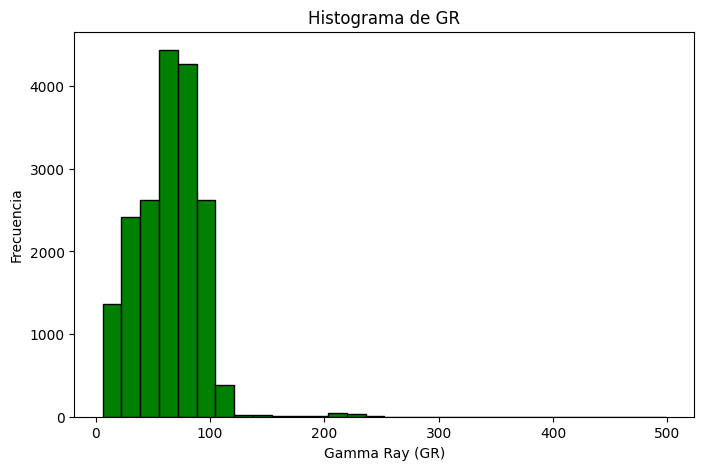

In [ ]:
#Generé histogramas de cada variable, para obtener rangos y valores que mas se repiten:

#Gamma RAY (GR)
plt.figure(figsize=(8,5))                  # tamaño del gráfico
plt.hist(df['GR'], bins=30, color='green', edgecolor='black')
plt.xlabel('Gamma Ray (GR)')
plt.ylabel('Frecuencia')
plt.title('Histograma de GR')
plt.show()


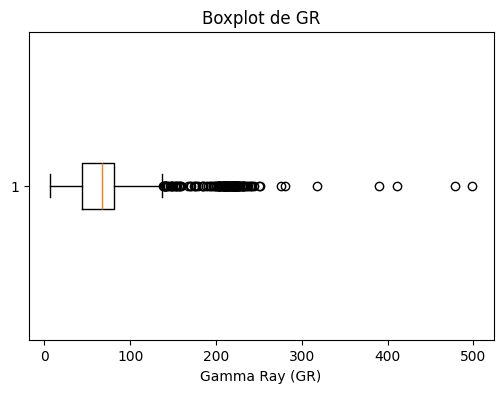

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(df['GR'].dropna(), vert=False)
plt.xlabel('Gamma Ray (GR)')
plt.title('Boxplot de GR')
plt.show()


In [ ]:
df['GR'].describe()


,GR
count,18270.000000
mean,63.847477
std,28.636331
min,6.191506
25%,43.866690
50%,66.777851
75%,81.542681
max,499.022583


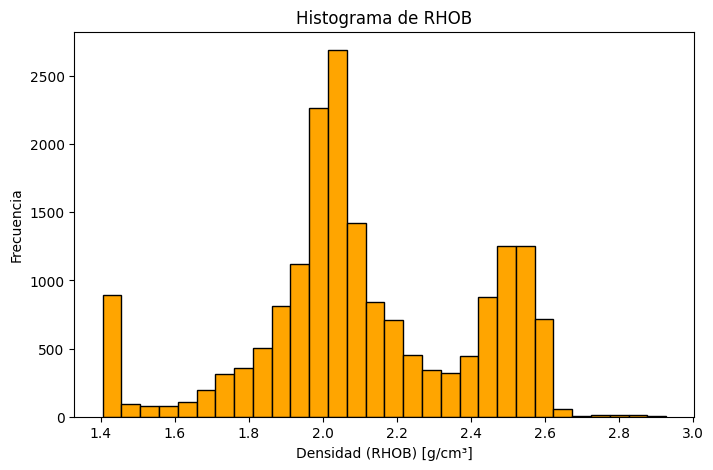

In [ ]:
# VARIABLE RHOB

plt.figure(figsize=(8,5))
plt.hist(df['RHOB'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Densidad (RHOB) [g/cm³]')
plt.ylabel('Frecuencia')
plt.title('Histograma de RHOB')
plt.show()


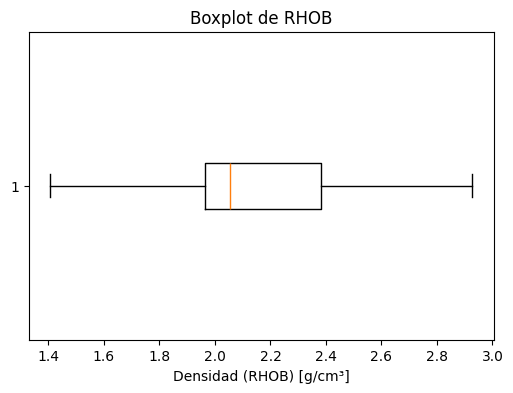

In [ ]:
#BOX PLOT

plt.figure(figsize=(6,4))
plt.boxplot(df['RHOB'].dropna(), vert=False)
plt.xlabel('Densidad (RHOB) [g/cm³]')
plt.title('Boxplot de RHOB')
plt.show()


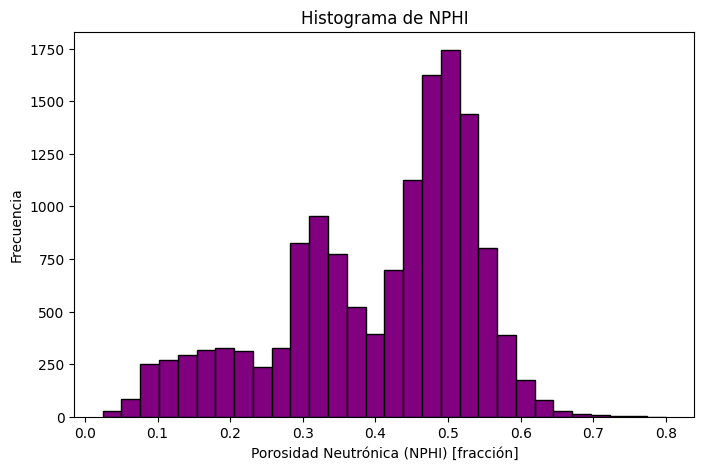

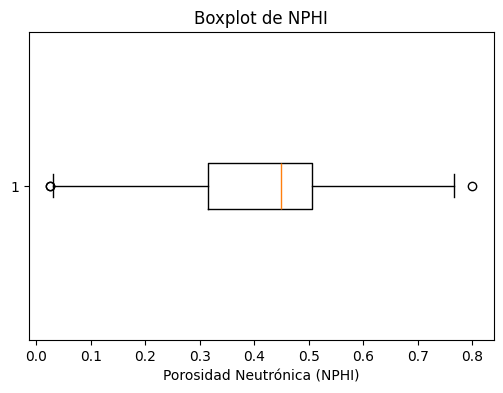

In [ ]:
# Histograma NPHI
plt.figure(figsize=(8,5))
plt.hist(df['NPHI'].dropna(), bins=30, color='purple', edgecolor='black')
plt.xlabel('Porosidad Neutrónica (NPHI) [fracción]')
plt.ylabel('Frecuencia')
plt.title('Histograma de NPHI')
plt.show()

# Boxplot NPHI
plt.figure(figsize=(6,4))
plt.boxplot(df['NPHI'].dropna(), vert=False)
plt.xlabel('Porosidad Neutrónica (NPHI)')
plt.title('Boxplot de NPHI')
plt.show()


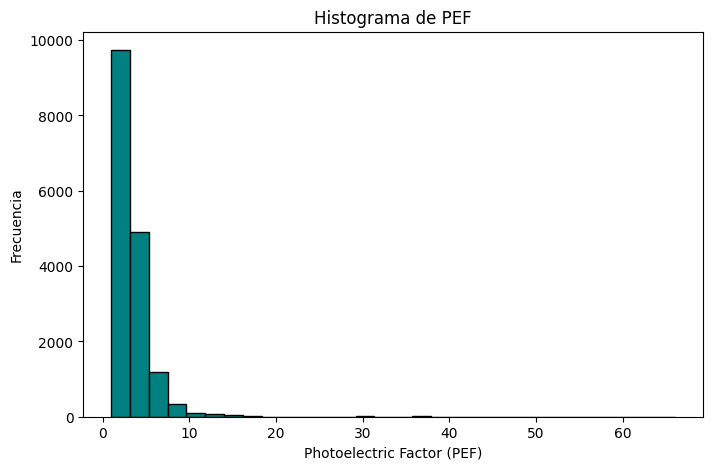

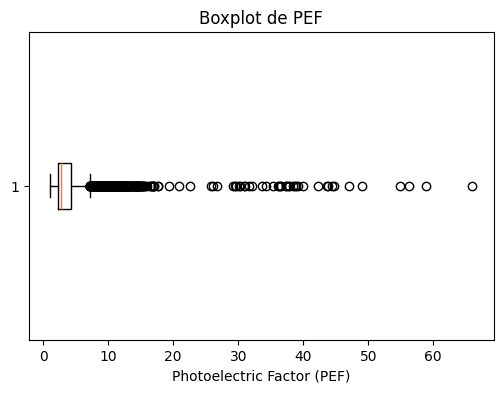

In [ ]:
# Histograma PEF
plt.figure(figsize=(8,5))
plt.hist(df['PEF'].dropna(), bins=30, color='teal', edgecolor='black')
plt.xlabel('Photoelectric Factor (PEF)')
plt.ylabel('Frecuencia')
plt.title('Histograma de PEF')
plt.show()

# Boxplot PEF
plt.figure(figsize=(6,4))
plt.boxplot(df['PEF'].dropna(), vert=False)
plt.xlabel('Photoelectric Factor (PEF)')
plt.title('Boxplot de PEF')
plt.show()


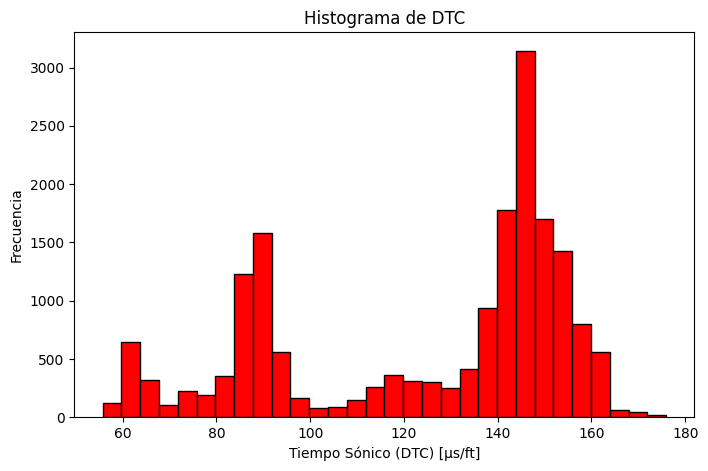

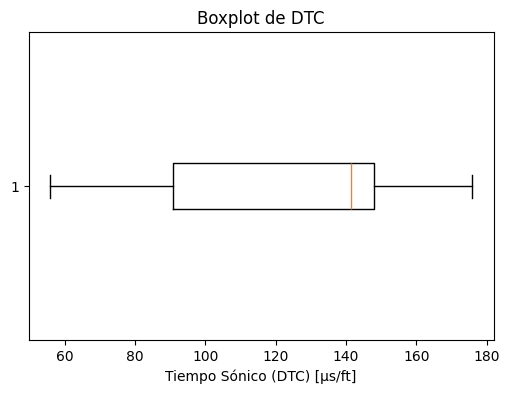

In [ ]:
# Histograma DTC
plt.figure(figsize=(8,5))
plt.hist(df['DTC'].dropna(), bins=30, color='red', edgecolor='black')
plt.xlabel('Tiempo Sónico (DTC) [µs/ft]')
plt.ylabel('Frecuencia')
plt.title('Histograma de DTC')
plt.show()

# Boxplot DTC
plt.figure(figsize=(6,4))
plt.boxplot(df['DTC'].dropna(), vert=False)
plt.xlabel('Tiempo Sónico (DTC) [µs/ft]')
plt.title('Boxplot de DTC')
plt.show()


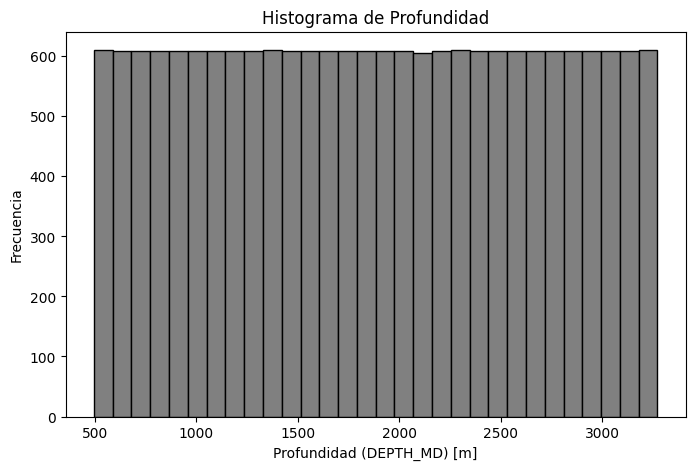

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['DEPTH_MD'], bins=30, color='gray', edgecolor='black')
plt.xlabel('Profundidad (DEPTH_MD) [m]')
plt.ylabel('Frecuencia')
plt.title('Histograma de Profundidad')
plt.show()


**3.2. ANALISIS BIVARIADO**

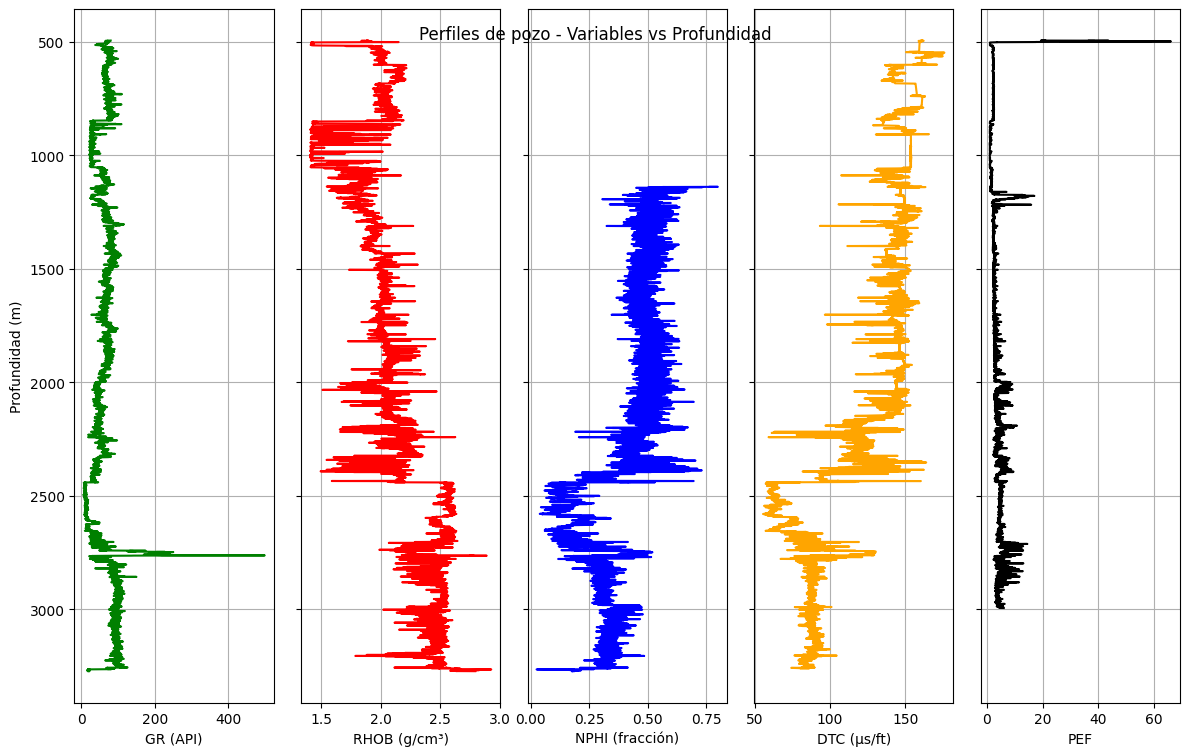

In [ ]:
#Cree graficos de todas las variables vs profundidad para que me quede tipo plot

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,8), sharey=True)

# GR
axes[0].plot(df['GR'], df['DEPTH_MD'], color='green')
axes[0].set_xlabel('GR (API)')
axes[0].invert_yaxis()  # profundidad hacia abajo
axes[0].set_ylabel('Profundidad (m)')
axes[0].grid()

# RHOB
axes[1].plot(df['RHOB'], df['DEPTH_MD'], color='red')
axes[1].set_xlabel('RHOB (g/cm³)')
axes[1].grid()

# NPHI
axes[2].plot(df['NPHI'], df['DEPTH_MD'], color='blue')
axes[2].set_xlabel('NPHI (fracción)')
axes[2].grid()

# DTC
axes[3].plot(df['DTC'], df['DEPTH_MD'], color='orange')
axes[3].set_xlabel('DTC (µs/ft)')
axes[3].grid()

# PEF
axes[4].plot(df['PEF'], df['DEPTH_MD'], color='black')
axes[4].set_xlabel('PEF')
axes[4].grid()

plt.suptitle('Perfiles de pozo - Variables vs Profundidad', y=0.92)
plt.tight_layout()
plt.show()


**3.3 CROSS PLOTS ENTRE VARIABLES**

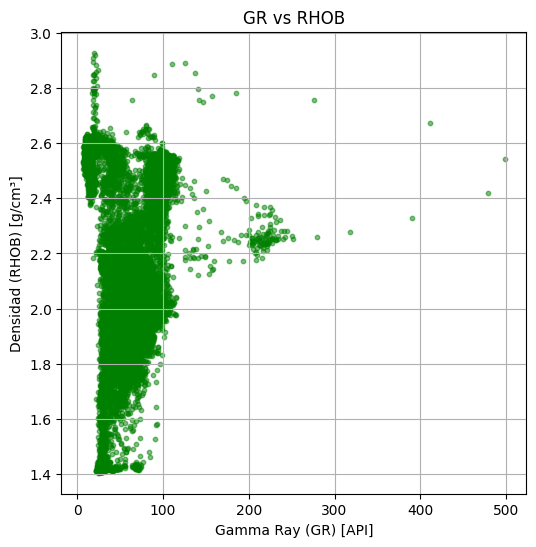

In [ ]:
#GR vs RHOB

plt.figure(figsize=(6,6))
plt.scatter(df['GR'], df['RHOB'], color='green', alpha=0.5, s=10)
plt.xlabel('Gamma Ray (GR) [API]')
plt.ylabel('Densidad (RHOB) [g/cm³]')
plt.title('GR vs RHOB')
plt.grid()
plt.show()

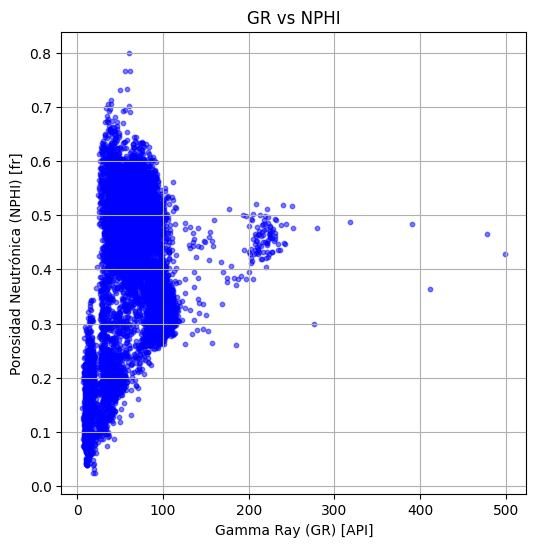

In [ ]:
#GR vs NPHI
plt.figure(figsize=(6,6))
plt.scatter(df['GR'], df['NPHI'], color='blue', alpha=0.5, s=10)
plt.xlabel('Gamma Ray (GR) [API]')
plt.ylabel('Porosidad Neutrónica (NPHI) [fr]')
plt.title('GR vs NPHI')
plt.grid()
plt.show()

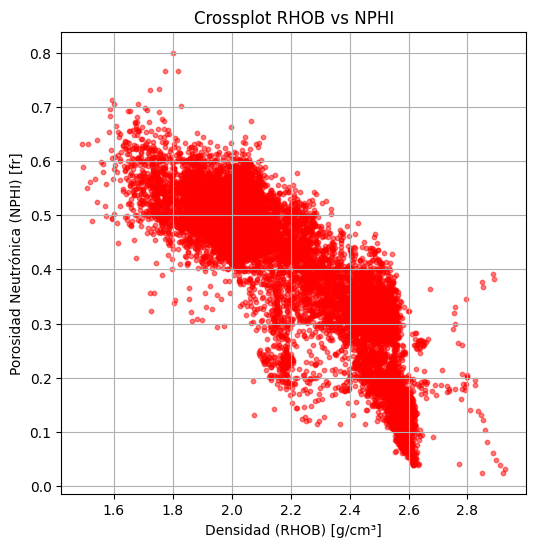

In [ ]:
#RHOB vs NPHI

plt.figure(figsize=(6,6))
plt.scatter(df['RHOB'], df['NPHI'], c='red', alpha=0.5, s=10)
plt.xlabel('Densidad (RHOB) [g/cm³]')
plt.ylabel('Porosidad Neutrónica (NPHI) [fr]')
plt.title('Crossplot RHOB vs NPHI')
plt.grid(True)
plt.show()


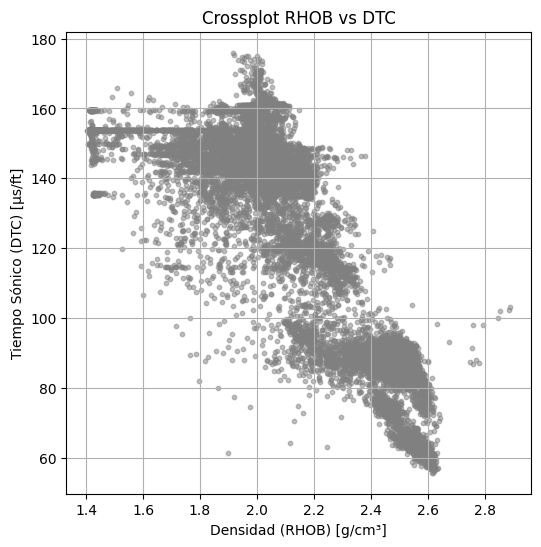

In [ ]:
#RHOB vs DTC

plt.figure(figsize=(6,6))
plt.scatter(df['RHOB'], df['DTC'], c='grey', alpha=0.5, s=10)
plt.xlabel('Densidad (RHOB) [g/cm³]')
plt.ylabel('Tiempo Sónico (DTC) [µs/ft]')
plt.title('Crossplot RHOB vs DTC')
plt.grid(True)
plt.show()


**3.4.1 MATRIZ DE CORRELACIÓN NUMERICA**

In [ ]:
# Calcular correlaciones de todas las variables numéricas

matriz_corr = df.corr()

# Mostrar la matriz completa
matriz_corr


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
RHOB,1.000000,0.176968,0.745932,-0.856195,0.280469,-0.824429
GR,0.176968,1.000000,0.139264,0.270694,-0.042698,0.081199
DEPTH_MD,0.745932,0.139264,1.000000,-0.654578,0.374282,-0.832520
NPHI,-0.856195,0.270694,-0.654578,1.000000,-0.259631,0.892950
PEF,0.280469,-0.042698,0.374282,-0.259631,1.000000,-0.325901
DTC,-0.824429,0.081199,-0.832520,0.892950,-0.325901,1.000000


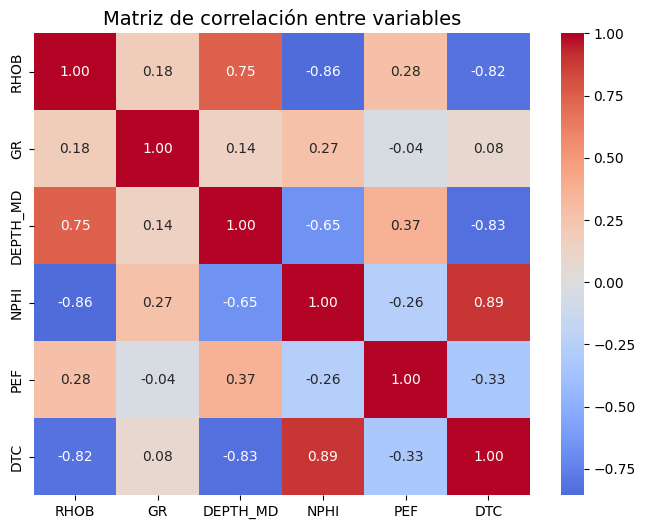

In [ ]:
#heatmap

import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Matriz de correlación entre variables", fontsize=14)
plt.show()


**3.3 ANALISIS MULTIVARIADO**

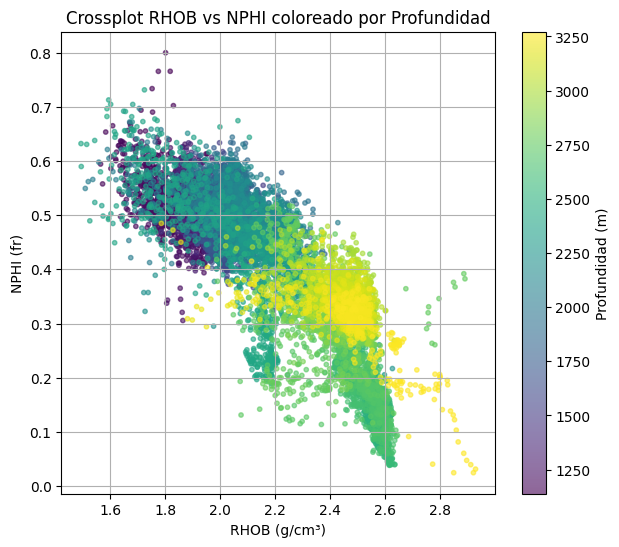

In [ ]:
# DEPTH vs RHOB vs NPHI

plt.figure(figsize=(7,6))
scatter = plt.scatter(
    df['RHOB'], df['NPHI'],
    c=df['DEPTH_MD'], cmap='viridis', alpha=0.6, s=10
)
plt.xlabel('RHOB (g/cm³)')
plt.ylabel('NPHI (fr)')
plt.title('Crossplot RHOB vs NPHI coloreado por Profundidad')
cbar = plt.colorbar(scatter)
cbar.set_label('Profundidad (m)')
plt.grid(True)
plt.show()


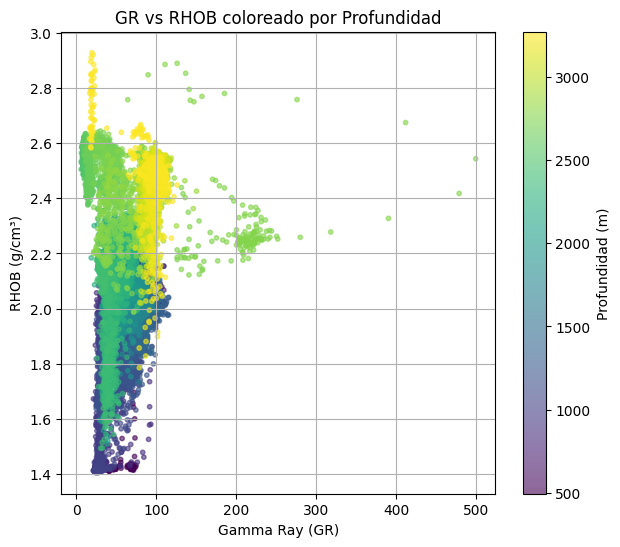

In [ ]:
# GR vs RHOB vs DEPTH

plt.figure(figsize=(7,6))
scatter = plt.scatter(
    df['GR'], df['RHOB'],
    c=df['DEPTH_MD'], cmap='viridis', alpha=0.6, s=10
)
plt.xlabel('Gamma Ray (GR)')
plt.ylabel('RHOB (g/cm³)')
plt.title('GR vs RHOB coloreado por Profundidad')
cbar = plt.colorbar(scatter)
cbar.set_label('Profundidad (m)')
plt.grid(True)
plt.show()


CONCLUSIONES PARCIALES:

Hipotesis 1 y 2: El estudio exploratorio mediante histogramas, boxplots y el crossplot GR vs RHOB coloreado por profundidad muestra una correlación débil entre ambas variables. Aunque existen agrupaciones con altos valores de GR, la dispersión general de los datos sugiere que esta relación no es estrictamente lineal.

El crossplot RHOB vs NPHI coloreado por profundidad evidencia una clara tendencia descendente: las zonas de mayor densidad (RHOB > 2.4 g/cm³) presentan valores bajos de NPHI, mientras que las zonas de menor densidad tienden a ser más porosas.

2DA PARTE DEL PROYECTO-Modelo predictivo

In [ ]:
# 1️⃣ Importar librerías necesarias (Lo hice en 2 etapas por eso importo nuevamente etc)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 2️⃣ Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/AndreaMuntaner/Data-Science-I/main/force2020_data_unsupervised_learning.csv"
df = pd.read_csv(url)

# Ver primeras filas
df.head()


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


1. DEFINICION DEL PROBLEMA : predecir litologia segun registros petrofisicos

In [ ]:
# Contar valores nulos por columna
df.isnull().sum()


,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81
Litologia,0


In [ ]:
df[['RHOB', 'NPHI', 'PEF', 'DTC']].describe()


,RHOB,NPHI,PEF,DTC
count,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,0.404547,3.463851,125.106178
std,0.297725,0.133532,2.561239,30.618337
min,1.404576,0.024330,1.010027,55.726753
25%,1.963399,0.315346,2.320836,90.883087
50%,2.055079,0.448527,2.790249,141.300461
75%,2.381963,0.506343,4.267342,148.048355
max,2.927888,0.800262,66.030319,175.953140


El porcentaje de nulos es el siguiente:
**NPHI** → 4.238 nulos (≈ 23 %)

PEF → 1.830 nulos (≈ 10 %)

DTC → 81 nulos (menos del 1 %)
Las otras variables (RHOB, GR, DEPTH_MD, Litologia) no tienen nulos.   Dado que el neutron es una medida directa de la roca, no seria correcto asumir el valor de mediana, por lo que en este caso se decide eliminar los nulos.

In [ ]:
# 🔹 Elimino las filas que tengan nulos en las variables medidas directamente
df = df.dropna(subset=['NPHI', 'PEF', 'DTC'])

# Verifico que no queden nulos
df.isnull().sum()


,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0
Litologia,0


**2.-DEFINIR LAS VARIABLES X E Y (FEATURE SELECTION) PARA ENTRENAR EL MODELO **

elegí todas las variables (RHOB, NPHI, DTC, PEF Y PROF) , porque son medidas directas de registros de pozos y estan directamente relacionados con la composicion de la roca. Estas cinco variables proporcionan una descripción física completa de las propiedades de la roca, por lo que resultan adecuadas para que el modelo identifique patrones y relacione los valores medidos con el tipo de litología.

In [ ]:

# Cree una nueva columna "Litologia"
# Si GR < 75 = 1 (limpio), si GR >= 75 = 0 (arcilloso)
df['Litologia'] = np.where(df['GR'] < 75, 1, 0)

# Vemos cuántos registros hay de cada tipo
df['Litologia'].value_counts()


,count
Litologia,
1,11854
0,6416


In [ ]:
# Selección de características (features)
X = df[['RHOB', 'NPHI', 'PEF', 'DTC', 'DEPTH_MD']]

# Variable objetivo (target)
y = df['Litologia']

# Verificar forma y consistencia (para ver que todo coincida)
print("Shape X:", X.shape)
print("Shape y:", y.shape)

X.head()


Shape X: (12202, 5)
Shape y: (12202,)


,RHOB,NPHI,PEF,DTC,DEPTH_MD
4238,1.774626,0.765867,1.631495,147.837677,1138.704
4239,1.800986,0.800262,1.645080,142.382431,1138.856
4240,1.817696,0.765957,1.645873,138.258331,1139.008
4241,1.829333,0.702521,1.620216,139.198914,1139.160
4242,1.813854,0.639708,1.504854,144.290085,1139.312


**3.- ENTRENAMIENTO DEL MODELO:** Separo datos en entrenamiento y prueba para que el modelo aprenda con una parte de los datos (train) y luego se evalúe con datos nuevos (test).

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verifico los tamaños
print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (9761, 5)
Tamaño prueba: (2441, 5)


.-ENTRENAR EL MODELO : Mi variable objetivo, que es litologia, tiene 2 clases (0 y 1), es decir clasificacion binaria , por lo tanto voy a usar un modelo de regresion logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
modelo = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = modelo.predict(X_test)


**4.- EVALUACION DEL MODELO **(Calculé varias metricas para entender qu etan bien clasifica las litologias)

Exactitud (Accuracy): 0.738

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.69      0.20      0.31       717
           1       0.74      0.96      0.84      1724

    accuracy                           0.74      2441
   macro avg       0.71      0.58      0.57      2441
weighted avg       0.73      0.74      0.68      2441



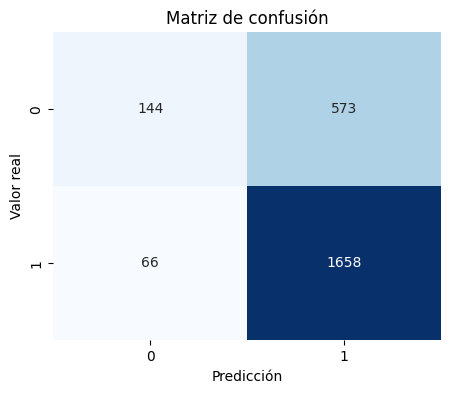

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud (Accuracy): {accuracy:.3f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show()


**5.- CONCLUSIONES PRELIMINARES modelo predictivo**

El modelo de regresión logística logró una exactitud del 74 %, mostrando un buen desempeño general para predecir el tipo de litología a partir de los registros petrofísicos.

Sin embargo, el análisis de la matriz indica que la clase “arcillosa” (0) es subrepresentada y el modelo tiende a clasificarla erróneamente como “limpia” (1).

Esto sugiere un desequilibrio de clases en el dataset, que podría corregirse en una siguiente iteración mediante técnicas de balanceo o modelos más complejos (p. ej. Random Forest o XGBoost).

Aun así, los resultados iniciales son coherentes con la tendencia esperada: la relación entre densidad (RHOB) y porosidad (NPHI) es una de las más influyentes para distinguir litologías, confirmando el comportamiento observado en el análisis exploratorio previo.



In [ ]:
OPCION B: modelo mas robusto

Exactitud (Accuracy) del Random Forest: 0.946

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       717
           1       0.95      0.97      0.96      1724

    accuracy                           0.95      2441
   macro avg       0.94      0.93      0.93      2441
weighted avg       0.95      0.95      0.95      2441



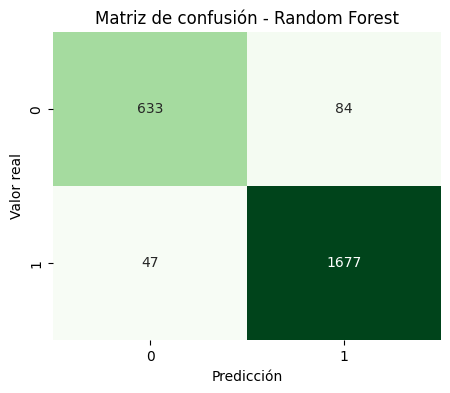

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cree el modelo
modelo_rf = RandomForestClassifier(
    n_estimators=200,       # número de árboles (cuantos más, mejor precisión pero más lento)
    random_state=42,
    class_weight='balanced' # ajusta el peso de cada clase para compensar el desbalance (más 1 que 0)
)

# Entrene el modelo
modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el rendimiento
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud (Accuracy) del Random Forest: {accuracy_rf:.3f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - Random Forest")
plt.show()


Un modelo mas robusto mejora notablemente la prediccion de 0 (zona arcillosa), acertando el 95% de las veces la litologia.

#CONCLUSIONES FINALES

Hipótesis 1: La hipótesis se cumple parcialmente. GR no presenta una correlación fuerte con RHOB, pero sí muestra agrupaciones que podrían corresponder a variaciones litológicas.

Hipótesis 2: La hipótesis se confirma. El crossplot RHOB vs NPHI coloreado por profundidad evidencia una clara tendencia descendente: las zonas de mayor densidad (RHOB > 2.4 g/cm³) presentan valores bajos de NPHI, mientras que las zonas de menor densidad tienden a ser más porosas. RHOB y NPHI muestran una fuerte correlación negativa (≈ –0.85) coherente con la respuesta petrofísica esperada, lo que permite distinguir sectores compactos y porosos de manera clara.

Hipótesis 3: La hipótesis se confirma. El modelo Random Forest logra predecir correctamente la litología en base a las variables petrofísicas, validando que el conjunto de características seleccionado es representativo y adecuado para la clasificación de formaciones. La Regresión Logística alcanzó una precisión del 74%, mientras que el Random Forest mejoró el desempeño a un 95% de exactitud, con una excelente capacidad de generalización y baja tasa de falsos positivos.